In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../major-crime-indicators.csv')

In [3]:
df.describe()

,_id,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84
count,420200.000000,420200.000000,420200.000000,420200.000000,420200.000000,420056.000000,420056.000000,420056.000000,420200.000000,420200.000000,420200.000000,413904.000000,413904.000000
mean,210100.500000,2019.386318,15.753870,186.549907,12.703046,2019.322043,15.442867,185.716216,12.556763,1710.741521,147.253127,-79.398314,43.706711
std,121301.435894,3.190250,8.778498,103.870838,6.458732,3.225379,8.944200,104.271781,7.283649,329.726694,52.287475,0.103381,0.052826
min,1.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,1410.000000,100.000000,-79.639247,43.586487
25%,105050.750000,2017.000000,8.000000,98.000000,8.000000,2017.000000,8.000000,97.000000,6.000000,1430.000000,100.000000,-79.476579,43.660811
50%,210100.500000,2019.000000,16.000000,189.000000,13.000000,2019.000000,15.000000,187.000000,14.000000,1457.000000,100.000000,-79.396216,43.700697
75%,315150.250000,2022.000000,23.000000,276.000000,18.000000,2022.000000,23.000000,275.000000,19.000000,2120.000000,200.000000,-79.327552,43.751400
max,420200.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,2135.000000,230.000000,-79.122044,43.853164


In [4]:
df.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,1,GO-20141263217,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,16,...,2135,210,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654
1,2,GO-20141260715,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3,...,1430,100,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.455770,43.677775
2,3,GO-20141260730,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3,...,1430,100,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.406223,43.727681
3,4,GO-20141260597,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2,...,1430,100,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946
4,5,GO-20141259762,2014-01-01,2013-12-31,2014,January,1,1,Wednesday,2,...,1430,100,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.390786,43.649125


In [5]:
df.columns

Index(['_id', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84'],
      dtype='object')

Based on these columns, maybe we can decide on a more useful database structure for our application? For example, lets only use one of the neighborhood identifiers

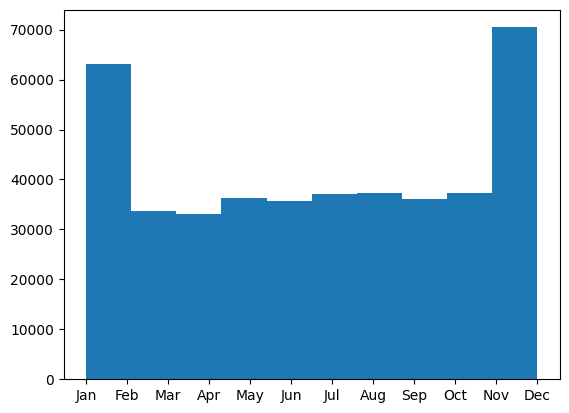

In [ ]:
#Histogram of crimes by month - maybe certain crimes are classified as Dec or Jan by default?
def cut(s):
    return s[:3]

plt.hist((df['REPORT_MONTH'].apply(cut)))
plt.title()
plt.show()

In [14]:
#work on smaller set of data
subdf = df[df['REPORT_YEAR'] == 2024]

(array([57912., 52402., 59927., 47073., 45838., 36820., 39512., 27932.,
        30973., 21811.]),
 array([  0.,  14.,  28.,  42.,  56.,  70.,  84.,  98., 112., 126., 140.]),
 <BarContainer object of 10 artists>)

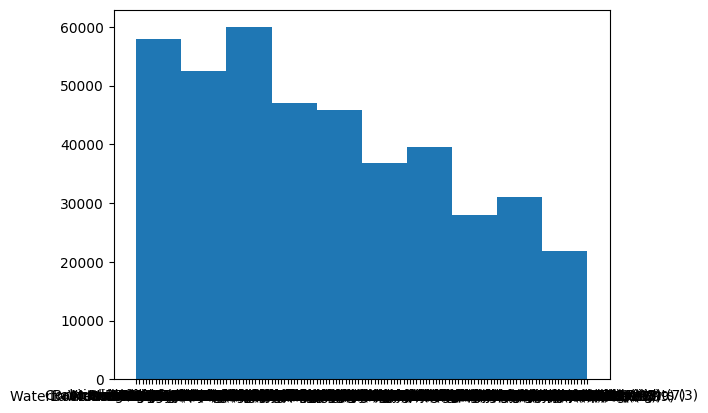

In [18]:
plt.hist(df['NEIGHBOURHOOD_140'])

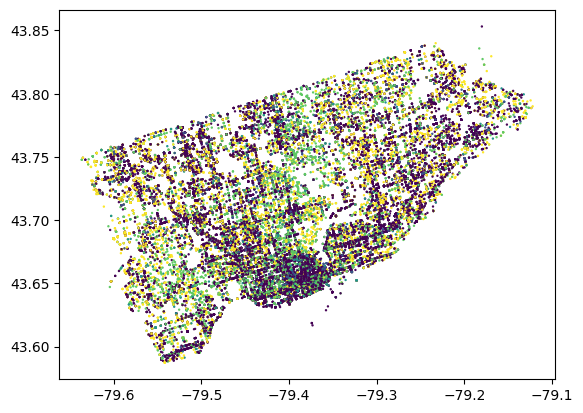

In [16]:
colors, uniques = pd.factorize(subdf['MCI_CATEGORY'])
plt.scatter(subdf['LONG_WGS84'], subdf['LAT_WGS84'], c=colors, s=0.5)
plt.show()

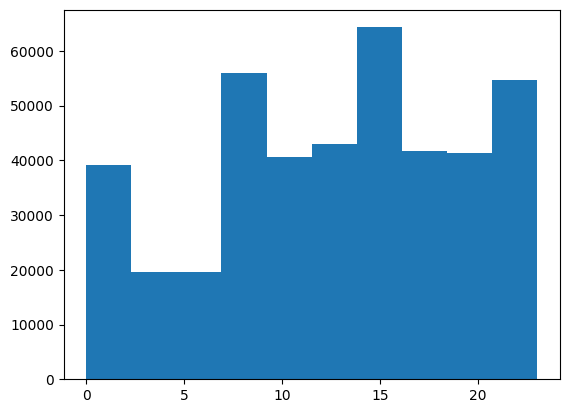

In [13]:
#Histogram of crimes by month - maybe certain crimes are classified as Dec or Jan by default?
plt.hist(df['REPORT_HOUR'])
plt.show()

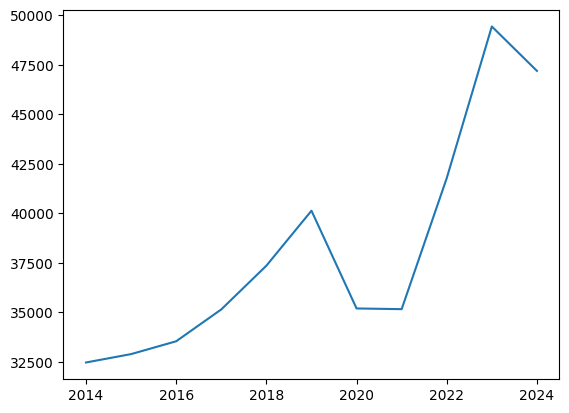

In [14]:
#Visualize change in crime rate over time
dfg = df.groupby(by='REPORT_YEAR').size().reset_index()
dfg = dfg.rename(columns={'REPORT_YEAR':'Year',0:'Count'})
plt.plot(dfg['Year'],dfg['Count'])
plt.show()

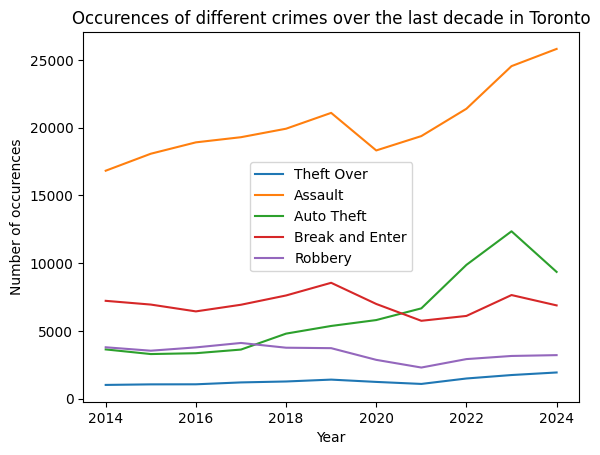

In [24]:
dfgg = df.groupby(by=['REPORT_YEAR','MCI_CATEGORY']).size().reset_index().rename(columns={0:'COUNT'})
crimes = list(set(dfgg['MCI_CATEGORY']))
#years = list(range(2014,2025))

for crime in crimes:
    plt.plot(dfgg[dfgg['MCI_CATEGORY'] == crime]['REPORT_YEAR'], dfgg[dfgg['MCI_CATEGORY'] == crime]['COUNT'],label=crime)
plt.legend()
plt.ylabel("Number of occurences")
plt.xlabel("Year")
plt.title("Occurences of different crimes over the last decade in Toronto")
plt.show()

In [16]:
#Check your safety
print("Enter your latitude and longitude")

Enter your latitude and longitude
